# Wrangling and Analyze Data - Udacity Data Analyst Project 2

## Table of Contents:

1. [INTRODUCTION](##1.-Introduction)

2. [GATHERING DATA](##2.-Gathering_Data)

    * [Importing Twitter Archived Data](##1.-Importing_Twitter_Archived_Data)
    * [Importing Image Predictions Data](##2.-Importing_Image_Predictions_Data)
    * [Importing Twitter API Data](##3.-Importing_Twitter_API_Data)

3. [ASSESSING DATA](#3.-Assessing_Data)

    * [Visual and Programmatic Assessment](##1.-Visual_and_Programmatic_Assessment)
    * [Identifying Quality Issues](##2.-Identifying_Quality_Issues)
    * [Identifying Tidiness Issues](##3.-Identifying_Tidiness_Issues)

4. [CLEANING DATA](#4.-Data_Cleaning)


5. [STORING DATA](#5.-Storing_Data)


6. [ANALYZING AND VISUALIZING DATA](#6.-Analyzing_and_Visualizing_Data)

##  1.0 Introduction

> The purpose of this data wrangling project is to Gather, Assess and Clean tweets from the Twitter page, WeRateDogs. On this page, people give reviews and rate dogs with very exciting reviews and a humorous comment to go with it. These ratings almost always have a denominator of 10.

In [1]:
# Next, we import all neccessary libraries we might need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
import os
import requests
import timeit 
from PIL import Image
from timeit import default_timer as timer
from io import BytesIO


## 2.0 Gathering Data

* In the cell below, gather all three pieces of data for this project and load them in the notebook.

* Gathering each data set requires different methods

* Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [2]:
#read the @WeRateDog twitter archive to dataframe

df_twt = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# having a look at the data
df_twt

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
# get the image_predictions.tsv from the internet programmatically
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#  get the shape of the url into response
#response = requests.get(url)
#write response content to a file named file
#with open(url.split('/')[-1], mode='wb') as file:
    #file.write(response.content)

In [5]:
# get the downloaded file into dataframe
df_img = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
# check content of downloaded file
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'xxx'
#consumer_secret = 'xxx'
#access_token = 'xxx'
#access_secret = 'xxx'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twt.tweet_id.values
len(tweet_ids)

2356

In [9]:
# get json data for each of the tweet ids in the twitter archive
##tweet_ids = df_twt.tweet_id.values
#len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
    #    print(str(count) + ": " + str(tweet_id))
    #    try:
        #    tweet = api.get_status(tweet_id, tweet_mode='extended')
         #   print("Success")
          #  json.dump(tweet._json, outfile)
         #   outfile.write('\n')
        #except tweepy.TweepyException as e:
          #  print("Fail")
           # fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [10]:
# Using one tweet ID as an example: Get the status of one tweet ID
#Twitter_Sample_Page = api.get_status(748699167502000129, tweet_mode='extended')
#Twitter_Sample_Page

In [11]:
#Access details in the downloaded Tweet-json file

# Empty list to convert to DataFrame
df_list = []

# Open text file for reading
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retweet_count = each_tweet_line['retweet_count']
        favourite_count = each_tweet_line['favorite_count']
        whole_source = each_tweet_line['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        
        df_list.append({'id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favourite_count, 'source': source})
        
tweet_json = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count','source'])

In [12]:
df_list

[{'id': 892420643555336193,
  'retweet_count': 6985,
  'favorite_count': 33760,
  'source': 'Twitter for iPhone'},
 {'id': 892177421306343426,
  'retweet_count': 5288,
  'favorite_count': 29290,
  'source': 'Twitter for iPhone'},
 {'id': 891815181378084864,
  'retweet_count': 3469,
  'favorite_count': 22022,
  'source': 'Twitter for iPhone'},
 {'id': 891689557279858688,
  'retweet_count': 7211,
  'favorite_count': 36879,
  'source': 'Twitter for iPhone'},
 {'id': 891327558926688256,
  'retweet_count': 7738,
  'favorite_count': 35252,
  'source': 'Twitter for iPhone'},
 {'id': 891087950875897856,
  'retweet_count': 2593,
  'favorite_count': 17781,
  'source': 'Twitter for iPhone'},
 {'id': 890971913173991426,
  'retweet_count': 1653,
  'favorite_count': 10349,
  'source': 'Twitter for iPhone'},
 {'id': 890729181411237888,
  'retweet_count': 15719,
  'favorite_count': 56771,
  'source': 'Twitter for iPhone'},
 {'id': 890609185150312448,
  'retweet_count': 3611,
  'favorite_count': 24480,

In [13]:
tweet_json

,id,retweet_count,favorite_count,source
0,892420643555336193,6985,33760,Twitter for iPhone
1,892177421306343426,5288,29290,Twitter for iPhone
2,891815181378084864,3469,22022,Twitter for iPhone
3,891689557279858688,7211,36879,Twitter for iPhone
4,891327558926688256,7738,35252,Twitter for iPhone
...,...,...,...,...
2322,666049248165822465,36,88,Twitter for iPhone
2323,666044226329800704,115,247,Twitter for iPhone
2324,666033412701032449,36,100,Twitter for iPhone
2325,666029285002620928,39,112,Twitter for iPhone




## 3.0 Assessing Data

Now that we have gathered the three pieces of data, the next step is to assess them visually and programmatically for quality and tidiness issues.
 
At **least eight (8)** quality issues and two (2) tidiness issues will be identified

**The following issues must be assessed.**

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


### Some important twitter_archive columns description:

* tweet_id: the unique identifier for each tweet


* timestamp: time when this Tweet was created

* source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client


* retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

* retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID


* rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

* rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

* name: name of the dog

* doggo: one of the 4 dog stages

* floofer: one of the 4 dog stages

* pupper: one of the 4 dog "stages

* puppo: one of the 4 dog stages

### Some important image_prediction columns description:
* tweet_id: the unique identifier for each tweet


* p1: algorithm's #1 prediction for the image in the tweet

* p1_conf: how confident the algorithm is in its #1 prediction

* p1_dog: whether or not the #1 prediction is a breed of dog

* p2: algorithm's #2 prediction for the image in the tweet

* p2_conf: how confident the algorithm is in its #2 prediction

* p2_dog: whether or not the #2 prediction is a breed of dog

* p3: algorithm's #3 prediction for the image in the tweet

* p3_conf: how confident the algorithm is in its #3 prediction

* p3_dog: whether or not the #3 prediction is a breed of dog

### tweet_json columns description

* id: the unique identifier for each tweet

* retweet_count: the number of times the original tweet was retweeted

* favorite_count: the number of times the the original tweet was loved or liked

### Visual Assessment and Programmatic Assessment

#### First we look through the Twitter Archive Data visually and Programatically

In [14]:
# look through the Twitter Archive Data

df_twt.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
df_twt.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
#checking for the data types across columns
df_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
#view statistics of the data set
df_twt.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# examine 3 random sample data
df_twt.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1448,696405997980676096,NaN,NaN,2016-02-07 18:51:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berb. He just found out that they have...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696405997...,7,10,Berb,None,None,None,None
937,753298634498793472,NaN,NaN,2016-07-13 18:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
1649,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683742671...,11,10,Sebastian,None,None,None,None


In [19]:
#check data set for duplicates
df_twt.duplicated().sum()

0

In [20]:
#check for columns with missing data
df_twt.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
df_twt.shape

(2356, 17)

In [22]:
# look though Image prediction data set
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
df_twt.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


#### Now, assess the image prediction data set visually  and Programatically

In [24]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [26]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
374,672995267319328768,https://pbs.twimg.com/media/CVb1mRiWcAADBsE.jpg,1,French_bulldog,0.719559,True,boxer,0.166927,True,Boston_bull,0.101354,True
289,671163268581498880,https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg,1,African_hunting_dog,0.733025,False,plow,0.119377,False,Scottish_deerhound,0.026983,True


In [28]:
df_img.duplicated().sum()

0

In [29]:
df_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
df_img.isnull().shape

(2075, 12)

#### Finally, we visually access the Tweet-json.txt file downloaded from the Twitter API  and Programatically

In [31]:
tweet_json.head()

,id,retweet_count,favorite_count,source
0,892420643555336193,6985,33760,Twitter for iPhone
1,892177421306343426,5288,29290,Twitter for iPhone
2,891815181378084864,3469,22022,Twitter for iPhone
3,891689557279858688,7211,36879,Twitter for iPhone
4,891327558926688256,7738,35252,Twitter for iPhone


In [32]:
tweet_json.tail()

,id,retweet_count,favorite_count,source
2322,666049248165822465,36,88,Twitter for iPhone
2323,666044226329800704,115,247,Twitter for iPhone
2324,666033412701032449,36,100,Twitter for iPhone
2325,666029285002620928,39,112,Twitter for iPhone
2326,666020888022790149,422,2288,Twitter for iPhone


In [33]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   source          2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [34]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2465.286635,7042.513107
std,6.820795e+16,4174.636186,10944.478538
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1222.000000
50%,7.178418e+17,1148.000000,3045.000000
75%,7.986547e+17,2853.500000,8585.500000
max,8.924206e+17,70544.000000,144622.000000


In [35]:
tweet_json.head()

,id,retweet_count,favorite_count,source
0,892420643555336193,6985,33760,Twitter for iPhone
1,892177421306343426,5288,29290,Twitter for iPhone
2,891815181378084864,3469,22022,Twitter for iPhone
3,891689557279858688,7211,36879,Twitter for iPhone
4,891327558926688256,7738,35252,Twitter for iPhone


In [36]:
tweet_json.duplicated().sum()

0

In [37]:
tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
source            0
dtype: int64

In [38]:
tweet_json.shape

(2327, 4)

### Quality issues

#####  twitter_archive (df-twt)
* We only want original dog ratings, So all retweets data have to be removed (text column starts with RT @) as a user can retweet on their tweet. There are 181 rows non-null values in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp which would need to be dropped.
* Unnecessary expanded url and other retweet data not required for this  analysis
* Delete columns that won't be used for analysis
* Timestamp does not have correct data type (datetime).
* tweet id column is int instead of string(object)
* Replace None in 'doggo', 'floofer', 'pupper' and  'puppo' with Nan


##### Image Prediction (df_img)

* Non descriptive column headers for p1,p2 and p3
* Non uniformity of dog description alphabet case
* tweet id column is int instead of string(object)

##### API data (tweet_json)

* tweet id column is in int instead of string(object)
* column "id" not uniform compared to other dataframes




### Tidiness Issues

#### df_twt table
* The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.


#### All tables

* Information about one type of observational unit (tweets) is spread across three different files/dataframes. All columns in df_img should be an observational unit of the df_twt table. The retweet_count and favorite_count of tweet_json table should be an observational unit of the twitter_archived_clean table


## 4.0 Data Cleaning 

In this section, All the identified issues in the assessing stage will be addressed 

**Note**:

* Make a copy of the original data before cleaning. 

* Cleaning includes merging individual pieces of data according to the rules of tidy data. 

In [39]:
# make copies of original data sets for cleaning
df_twt_clean = df_twt.copy()
df_img_clean = df_img.copy()
tweet_json_clean = tweet_json.copy()

In [40]:
df_img_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### 4.1 Quality Issues

### Issues 1 & 2

**Define** :
* Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns
* Delete columns that won't be used for analysis


**Code**

In [41]:
df_twt_clean = df_twt_clean[df_twt_clean.retweeted_status_id.isnull()]
df_twt_clean = df_twt_clean[df_twt_clean.retweeted_status_user_id.isnull()]
df_twt_clean = df_twt_clean[df_twt_clean.retweeted_status_timestamp.isnull()]

In [42]:
# Dropping the unecesssary columns 
df_twt_clean = df_twt_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

C:\Users\ACER E15\AppData\Local\Temp\ipykernel_15552\3410065175.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_twt_clean = df_twt_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',


**Test**

In [43]:
# Check if the retweeted rows have been droped
df_twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


### Issue 3

**Define**

*Rectify Timestamp format to datetime*

**Code**

In [44]:
df_twt_clean['timestamp'] = pd.to_datetime(df_twt_clean['timestamp'])

**Test**

In [45]:
# Check if the timestamp format has changed
df_twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


### Issue 4,7,8

**Define**: Change tweet id columns in df_tw_clean, df_img_clean, tweet_json_clean from integers to string(object) format

**Code**

In [46]:
# Convert tweet_id column to string
df_twt_clean['tweet_id'] = df_twt_clean['tweet_id'].astype(str)
df_img_clean['tweet_id'] = df_img_clean['tweet_id'].astype(str)
tweet_json_clean['id'] = df_img_clean['tweet_id'].astype(str)

**Test**

In [47]:
df_twt_clean.info()
df_img_clean.info()
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 186.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data column

### Issue 5

**Define**: Make column headers p1, p2 and p3 more descriptive

**Code**

In [48]:
df_img_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

**Test**

In [49]:
df_img_clean.sample(20)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True
427,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,1,Eskimo_dog,0.615741,True,Siberian_husky,0.199544,True,malamute,0.179107,True
1702,817171292965273600,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,1,golden_retriever,0.295483,True,Irish_setter,0.144431,True,Chesapeake_Bay_retriever,0.077879,True
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,0.147364,True
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,1,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True
291,671182547775299584,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,Rottweiler,0.331179,True,kelpie,0.218601,True,Appenzeller,0.182520,True


### Issue 6


**Define**: Capitalize each letter of the first, second and third dog prediction

**Code**

In [50]:
df_img_clean['first_prediction'] = df_img_clean.first_prediction.str.capitalize()
df_img_clean['second_prediction'] = df_img_clean.second_prediction.str.capitalize()
df_img_clean['third_prediction'] = df_img_clean.third_prediction.str.capitalize();

**Test**

In [51]:
df_img_clean

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Issue 9

**Define**: rename column "id" in tweet_json_clean to "tweet_id" to ensure uniformity across dataframes

**Code**

In [52]:
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

**Test**

In [53]:
tweet_json_clean

,tweet_id,retweet_count,favorite_count,source
0,666020888022790149,6985,33760,Twitter for iPhone
1,666029285002620928,5288,29290,Twitter for iPhone
2,666033412701032449,3469,22022,Twitter for iPhone
3,666044226329800704,7211,36879,Twitter for iPhone
4,666049248165822465,7738,35252,Twitter for iPhone
...,...,...,...,...
2322,NaN,36,88,Twitter for iPhone
2323,NaN,115,247,Twitter for iPhone
2324,NaN,36,100,Twitter for iPhone
2325,NaN,39,112,Twitter for iPhone


### 4.2 Tidiness Issues

### Issue 1

**Define**: *merge 'doggo', 'floofer', 'pupper' and  'puppo' columns in df_tw_clean to be a single column called "Dog stage", and replace empty columns called "None" with Nan*

**Code**

In [54]:
# use a for loop to replace all the 'None' before merging columns
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in dog_stage:
        df_twt_clean[i] = df_twt_clean[i].replace('None', '')
        
df_twt_clean['dog_stage'] = df_twt_clean.doggo + df_twt_clean.floofer + df_twt_clean.pupper + df_twt_clean.puppo

# drop the four old colomns
df_twt_clean = df_twt_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
df_twt_clean['dog_stage'] = df_twt_clean['dog_stage'].replace('', np.nan)

In [55]:
# replace with a readable form
df_twt_clean.loc[df_twt_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twt_clean.loc[df_twt_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twt_clean.loc[df_twt_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

**Test**

In [56]:
df_twt_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2211,668614819948453888,2015-11-23 02:19:29+00:00,Here is a horned dog. Much grace. Can jump ove...,7,10,a,NaN
1412,698953797952008193,2016-02-14 19:35:46+00:00,Meet CeCe. She wanted to take a selfie before ...,11,10,CeCe,NaN
846,766313316352462849,2016-08-18 16:38:26+00:00,This is Oscar. He has legendary eyebrows and h...,12,10,Oscar,NaN
1512,691321916024623104,2016-01-24 18:09:23+00:00,This is Molly. She's a Peruvian Niddlewog. Lov...,11,10,Molly,NaN
381,827324948884643840,2017-02-03 01:16:53+00:00,This is Ralphie. He's being treated for an ove...,12,10,Ralphie,NaN
301,836677758902222849,2017-02-28 20:41:37+00:00,Say hello to Oliver. He's pretty exotic. Fairl...,11,10,Oliver,NaN
1776,677961670166224897,2015-12-18 21:20:32+00:00,This is Izzy. She's showing off the dance move...,11,10,Izzy,NaN
646,793150605191548928,2016-10-31 18:00:14+00:00,This is Nida. She's a free elf. Waited so long...,11,10,Nida,NaN
1651,683498322573824003,2016-01-03 04:01:13+00:00,This is Griffin. He's desperate for both a phy...,11,10,Griffin,NaN
383,827199976799354881,2017-02-02 17:00:17+00:00,This is Charlie. He wins every game of chess h...,13,10,Charlie,NaN


### Issue 2

**Define**: Join the 3 dataframes 'tweet_json_clean' , 'df_img_clean' 'df_twt_clean', so the tweet data can be in a single data frame

**Code**

In [57]:
#image_prediction_clean to df_tw
df_comb = pd.merge(df_twt_clean, 
                      df_img_clean, 
                      how = 'inner', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_comb = df_comb[df_comb['jpg_url'].notnull()]
df_comb = pd.merge(df_comb, tweet_json_clean, 
                      how = 'inner', on = ['tweet_id'])


**Test**

In [58]:
df_comb

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,first_prediction,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,source
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,...,False,Bagel,0.085851,False,Banana,0.076110,False,35,215,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,241,664,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,209,517,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,...,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,318,686,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,418,1051,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,7738,35252,Twitter for iPhone
1990,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,...,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,7211,36879,Twitter for iPhone
1991,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,...,True,Malinois,0.138584,True,Bloodhound,0.116197,True,3469,22022,Twitter for iPhone
1992,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,...,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,5288,29290,Twitter for iPhone


In [59]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   int64              
 4   rating_denominator  1994 non-null   int64              
 5   name                1994 non-null   object             
 6   dog_stage           306 non-null    object             
 7   jpg_url             1994 non-null   object             
 8   img_num             1994 non-null   int64              
 9   first_prediction    1994 non-null   object             
 10  first_confidence    1994 non-null   float64            
 11  first_dog           1994 non-null   bool               
 12  second_prediction   1994 non-null 

In [60]:
df_comb.describe()

,rating_numerator,rating_denominator,img_num,first_confidence,second_confidence,third_confidence,retweet_count,favorite_count
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,2764.490973,7929.338014
std,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,4394.714276,11467.516423
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,10.000000,10.000000,1.000000,0.362857,5.393987e-02,1.619283e-02,649.500000,1752.250000
50%,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1437.500000,3698.500000
75%,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,3157.000000,9963.750000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70544.000000,144622.000000


*The maximum and minimum rating_numerator of 1776 and 0 respectively, maximum and minimum rating_denominator of 170 and 2 respectively, maximum and minimum retweet_count of 1994 and 1 respectively, and maximum and minimum favorite_count of 1994 and 0 respectively*

## 5.0 Storing Data

In [61]:
#Store the clean DataFrame in a CSV file
df_comb.to_csv('twitter_archive_master.csv',index=False)

In [62]:
# Check if it was properly saved
df_comb = pd.read_csv("twitter_archive_master.csv")
df_comb.sample(65)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,first_prediction,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,source
1366,680913438424612864,2015-12-27 00:49:49+00:00,Meet Griswold. He's dapper as hell. Already pu...,11,10,Griswold,NaN,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,...,True,Golden_retriever,0.126455,True,Chihuahua,0.087184,True,3708,13573,Twitter for iPhone
1347,681694085539872773,2015-12-29 04:31:49+00:00,This is Bo. He's a Benedoop Cumbersnatch. Seem...,11,10,Bo,pupper,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,Toy_poodle,...,True,Miniature_poodle,0.060857,True,Maltese_dog,0.006064,True,2950,11887,Twitter for iPhone
1454,677187300187611136,2015-12-16 18:03:28+00:00,Here we see a Byzantine Rigatoni. Very aerodyn...,9,10,None,NaN,https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg,1,English_setter,...,True,Shih-tzu,0.084112,True,Old_english_sheepdog,0.059538,True,1871,8564,Twitter for iPhone
203,842163532590374912,2017-03-16 00:00:07+00:00,Meet George. He looks slightly deflated but ov...,12,10,George,NaN,https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg,2,French_bulldog,...,True,Soccer_ball,0.022811,False,Bull_mastiff,0.012852,True,409,984,Twitter for iPhone
1257,687124485711986689,2016-01-13 04:10:18+00:00,Say hello to Samson. He's a Firecracker Häagen...,11,10,Samson,NaN,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,Car_mirror,...,False,Seat_belt,0.000375,False,Beagle,0.000216,True,11317,0,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,681339448655802368,2015-12-28 05:02:37+00:00,This is Asher. He's not wearing a seatbelt or ...,9,10,Asher,NaN,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,Seat_belt,...,False,Labrador_retriever,0.094615,True,Kuvasz,0.089863,True,1986,9298,Twitter for iPhone
525,782747134529531904,2016-10-03 01:00:34+00:00,This is Deacon. He's the happiest almost dry d...,11,10,Deacon,doggo,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,Golden_retriever,...,True,Otterhound,0.199482,True,Clumber,0.040682,True,1154,3502,Twitter for iPhone
771,744995568523612160,2016-06-20 20:49:19+00:00,This is Abby. She got her face stuck in a glas...,9,10,Abby,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_english_sheepdog,...,True,Shih-tzu,0.146336,True,Tibetan_terrier,0.134269,True,476,2465,Twitter for iPhone
1563,674291837063053312,2015-12-08 18:17:56+00:00,This is Kenny. He just wants to be included in...,11,10,Kenny,NaN,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,...,True,Pembroke,0.368566,True,Chihuahua,0.003330,True,19413,0,Twitter for iPhone


## 6.0 Analyzing and Visualizing Data 

* In this section,  analysis and visualization of the wrangled data will be carried out.

**Note**:
1. We will produce at least three (3) insights and one (1) visualization.
2. We will clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.

In [63]:
# Load the dataset
df = pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,first_prediction,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,source
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,...,False,Bagel,0.085851,False,Banana,0.076110,False,35,215,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,241,664,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,209,517,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,...,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,318,686,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,418,1051,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,7738,35252,Twitter for iPhone
1990,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,...,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,7211,36879,Twitter for iPhone
1991,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,...,True,Malinois,0.138584,True,Bloodhound,0.116197,True,3469,22022,Twitter for iPhone
1992,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,...,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,5288,29290,Twitter for iPhone


### Insight 1: What are the top 3 most occuring dog stages ?

In [64]:
# display top dog stages
df['dog_stage'].value_counts().sort_values(axis=0, ascending=False)

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

Text(0, 0.5, 'Dog stage')

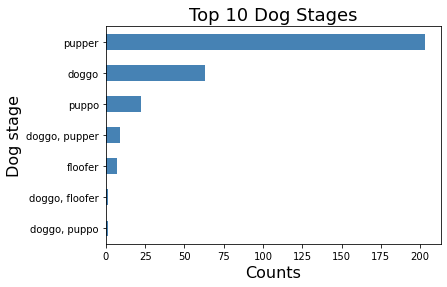

In [65]:
top_10_dog_stage = df['dog_stage'].value_counts()[0:10].sort_values(axis=0, ascending=True)
top_10_dog_stage.plot(kind = 'barh', color=['steelblue'])
plt.title('Top 10 Dog Stages', size=18)
plt.xlabel('Counts', size=16)
plt.ylabel('Dog stage', size=16)

* The top 3 Dog stages with the highest occurence are the "pupper, doggo and puppo" stages respectively

### Insight 2: What dog stage has the highest rating?

In [66]:
# Display rating across dog stages
Dog_rating = pd.DataFrame(df.groupby('dog_stage').mean()['rating_numerator'].sort_values(ascending=False).round(2))
Dog_rating

,rating_numerator
dog_stage,
"doggo, puppo",13.00
floofer,12.00
puppo,12.00
doggo,11.89
"doggo, floofer",11.00
"doggo, pupper",11.00
pupper,10.71


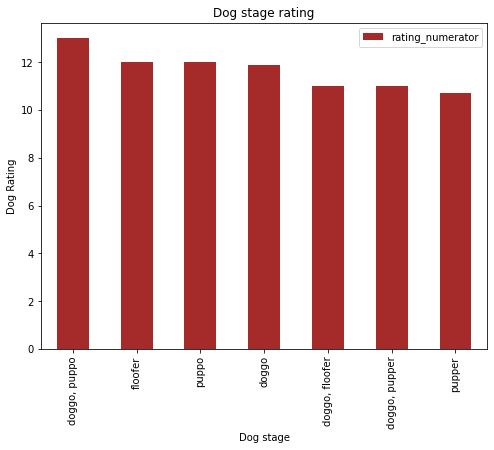

In [67]:
Dog_rating.plot(kind='bar', title = 'Dog stage rating', ylabel='Dog Rating',xlabel='Dog stage', figsize=(8,6), color ='Brown');

* The Dog stage with the highest rating is the "doggo, puppo" stage

### Insight 3: What are the 3 most Popular Dog Breeds?

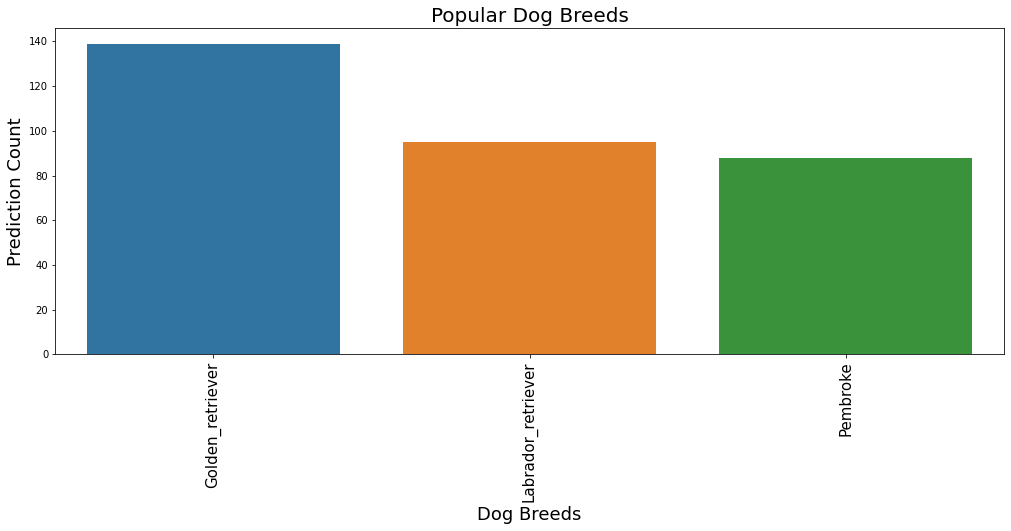

In [68]:
plt.figure(figsize = (17,6))
ax = sns.barplot(x = df['first_prediction'].value_counts()[0:3].index,
            y =df['first_prediction'].value_counts()[0:3],
            data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 20);

* The 3 most popular dog breeds are the "Golden_retriever", the "Labrador_retriever" and the "Rembroke"

In [69]:
golden_retriever_df = df_comb.query('first_prediction == "Golden_retriever"')
golden_retriever_df.sort_values(by = 'favorite_count',ascending = False,inplace = True)
golden_retriever_df=golden_retriever_df.loc[:,['favorite_count','jpg_url','rating_numerator','first_prediction']][0:10]

C:\Users\ACER E15\AppData\Local\Temp\ipykernel_15552\1105258238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golden_retriever_df.sort_values(by = 'favorite_count',ascending = False,inplace = True)


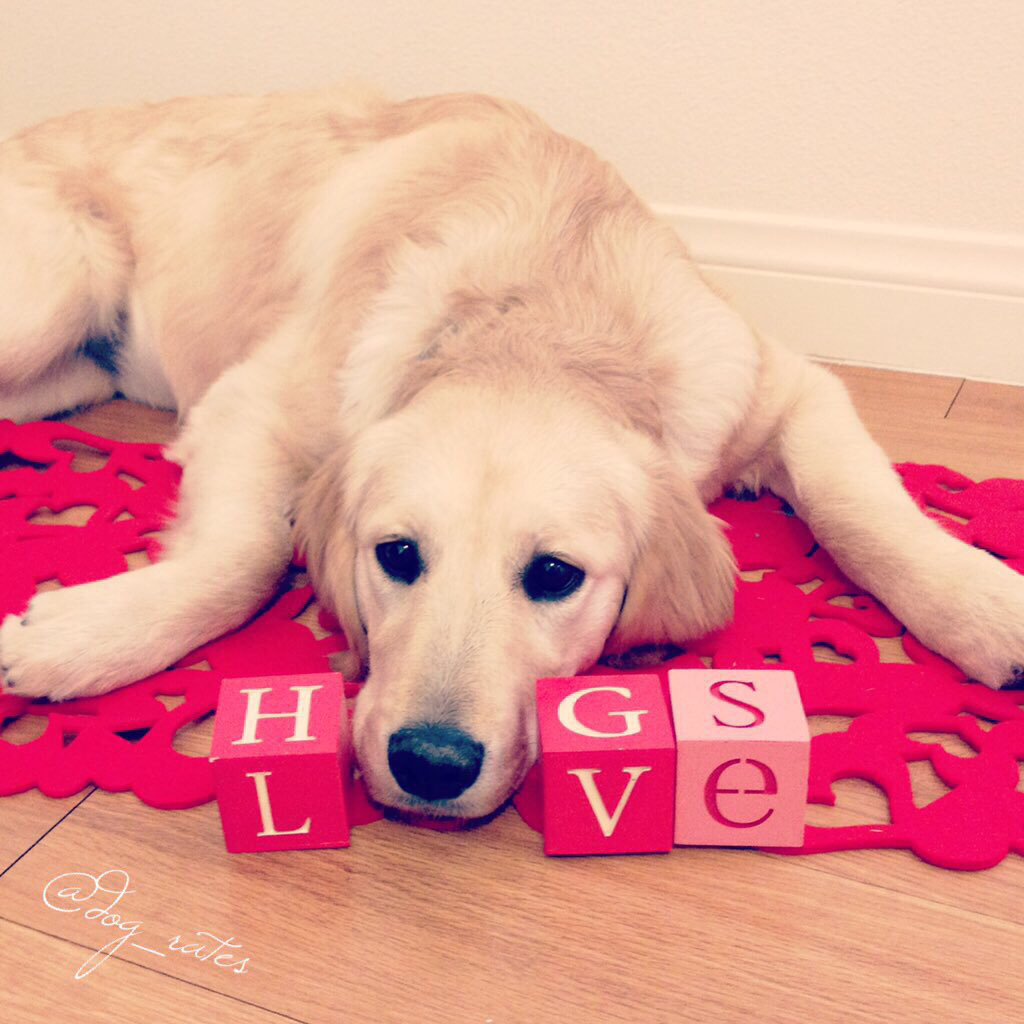

In [70]:
url = golden_retriever_df.jpg_url.iloc[3]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [71]:
Pembroke_df = df_comb.query('first_prediction == "Pembroke"')
Pembroke_df.sort_values(by = 'favorite_count',ascending = False,inplace = True)
Pembroke_df=Pembroke_df.loc[:,['favorite_count','jpg_url','rating_numerator','first_prediction']][0:10]

C:\Users\ACER E15\AppData\Local\Temp\ipykernel_15552\3309245971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pembroke_df.sort_values(by = 'favorite_count',ascending = False,inplace = True)


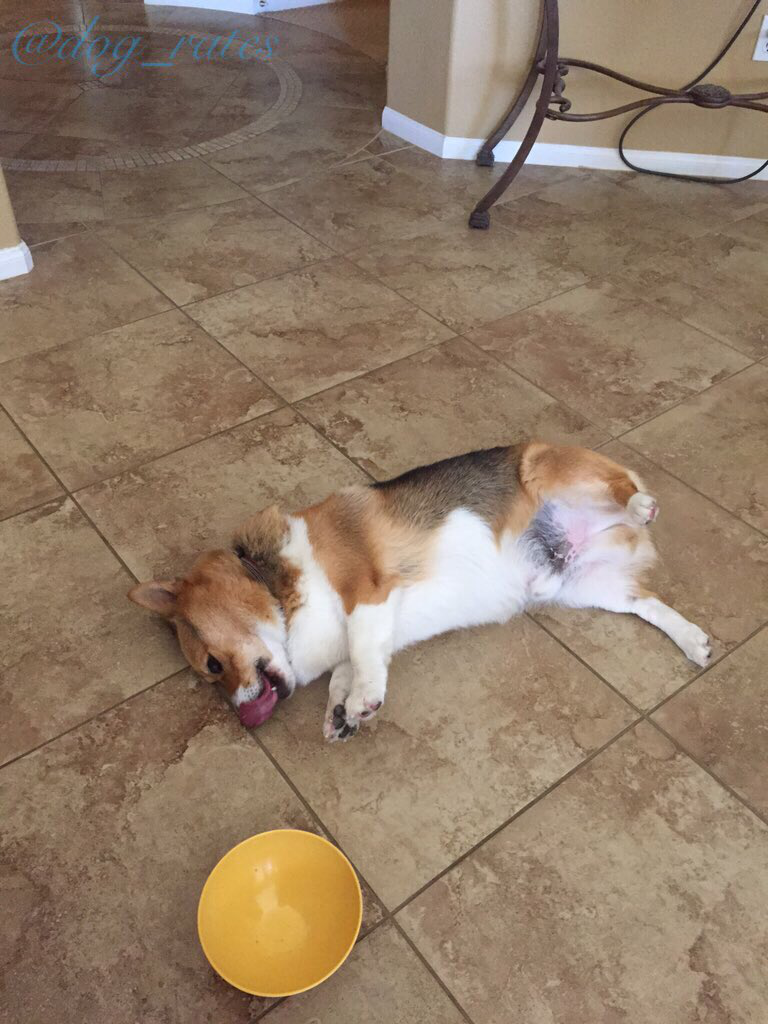

In [72]:
url = Pembroke_df.jpg_url.iloc[6]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [73]:
labret_df = df_comb.query('first_prediction == "Labrador_retriever"')
labret_df.sort_values(by = 'favorite_count',ascending = False,inplace = True)
labret_df=labret_df.loc[:,['favorite_count','jpg_url','rating_numerator','first_prediction']][0:10]

C:\Users\ACER E15\AppData\Local\Temp\ipykernel_15552\319106198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labret_df.sort_values(by = 'favorite_count',ascending = False,inplace = True)


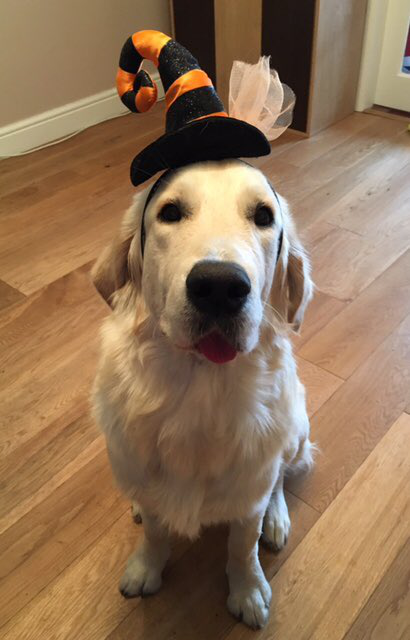

In [74]:
url = labret_df.jpg_url.iloc[9]
r = requests.get(url)
Image.open(BytesIO(r.content))

###  Image 1. A cute image of a Golden retriever

### Insight 4: What are the most popular dog names ?

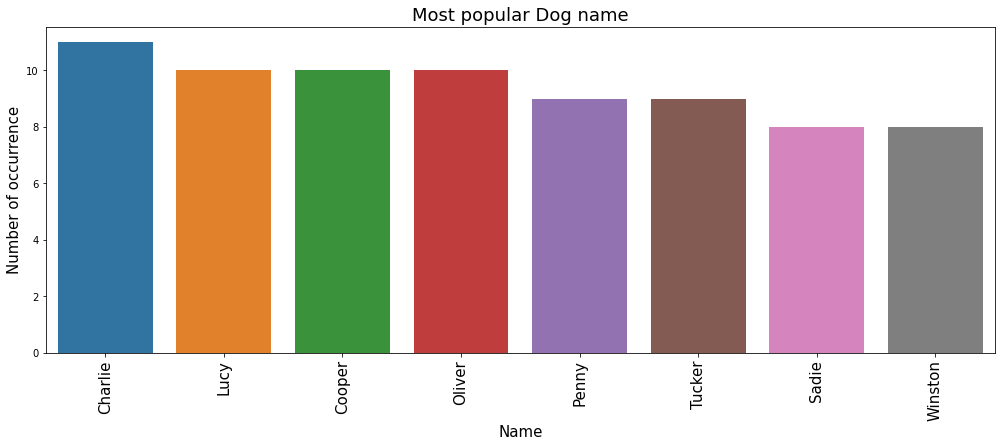

In [75]:
plt.figure(figsize = (17,6))
ax = sns.barplot(x = df['name'].value_counts()[2:10].index,
            y =df['name'].value_counts()[2:10],
            data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.title('Most popular Dog name', color = 'black', fontsize = '18')
plt.xlabel('Name', color = 'black', fontsize = '15')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '15');

### Insight 5: Is there a correlation between favorite count and retweet count ?

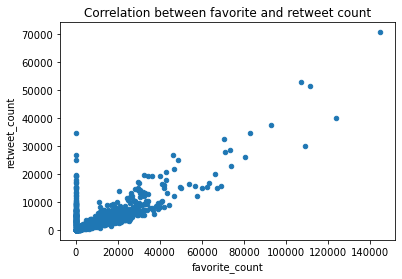

In [76]:
df.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Correlation between favorite and retweet count');

C:\Users\ACER E15\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

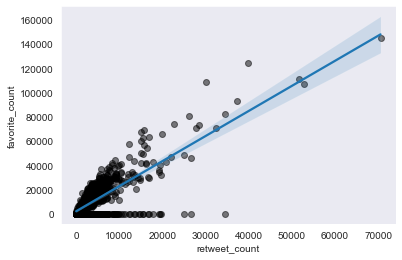

In [77]:
sns.set_style('dark')
sns.regplot(df.retweet_count, df.favorite_count, scatter_kws = {'color': 'black', 'alpha': 0.5})

* This shows that there positive correlation between retweet_count and favorite_count